In [1]:
cd ..

/home/janek/reasonable-embeddings


In [2]:
import numpy as np
import pandas as pd
import torch as T
import torch.nn.functional as F
import torch.nn as nn
from sklearn import metrics

from src.reasoner_mod import *
from src.generate import load_dataset
from src.reasoner import *
from src.utils import *
from src.vis import *
import random

In [3]:
seed = 2022
dataset_path = 'local/out/dataset/sub-100.json'
ts = timestr()
train_onto, test_onto, data_tr, data_vl, data_te = load_dataset(dataset_path)

emb_size = 10
hidden_size = 16
epoch_count = 12
test_epoch_count = 10
batch_size = 32

T.manual_seed(seed)
random.seed(seed)
trained_reasoner = ModifiedReasonerHead(emb_size=emb_size, hidden_size=hidden_size)
encoders = [ModifiedEmbeddingLayer.from_onto(onto, emb_size=emb_size) for onto in train_onto]

print(f'created reasoner with {paramcount(trained_reasoner)} parameters')
print(f'created {len(encoders)} encoders with {paramcount(encoders[0])} parameters each')

train_logger = train_mod(data_tr, data_vl, trained_reasoner, encoders, epoch_count=epoch_count, batch_size=batch_size,train_identities=True, lr_reasoner=0.00025, identities_weight=0.2)

created reasoner with 3283 parameters
created 40 encoders with 1270 parameters each
train epoch 00/12 | batch 2001/2000 | loss 1.8555 | val loss 0.7716 | acc 0.2131 | f1 0.3514 | prec 0.2131 | recall 1.0000 | roc auc 0.5142 | pr auc 0.2463 | elapsed 41.88s
train epoch 01/12 | batch 2001/2000 | loss 1.1070 | val loss 0.5406 | acc 0.7244 | f1 0.3942 | prec 0.3708 | recall 0.4208 | roc auc 0.6616 | pr auc 0.4666 | elapsed 108.34s
train epoch 02/12 | batch 2001/2000 | loss 0.7911 | val loss 0.4838 | acc 0.7629 | f1 0.5118 | prec 0.4560 | recall 0.5833 | roc auc 0.7676 | pr auc 0.5888 | elapsed 101.01s
train epoch 03/12 | batch 2001/2000 | loss 0.5912 | val loss 0.4046 | acc 0.8214 | f1 0.6127 | prec 0.5695 | recall 0.6630 | roc auc 0.8401 | pr auc 0.7049 | elapsed 97.27s
train epoch 04/12 | batch 2001/2000 | loss 0.4474 | val loss 0.3600 | acc 0.8528 | f1 0.6781 | prec 0.6350 | recall 0.7276 | roc auc 0.8777 | pr auc 0.7739 | elapsed 92.22s
train epoch 05/12 | batch 2001/2000 | loss 0.3538

In [4]:
train_logger = train_mod(data_tr, data_vl, trained_reasoner, encoders, epoch_count=8, batch_size=batch_size,train_identities=True, identities_weight=0.008)

train epoch 0/8 | batch 2001/2000 | loss 0.0839 | val loss 0.3172 | acc 0.8958 | f1 0.7682 | prec 0.7301 | recall 0.8106 | roc auc 0.9374 | pr auc 0.8749 | elapsed 58.86s
train epoch 1/8 | batch 2001/2000 | loss 0.0985 | val loss 0.2987 | acc 0.9034 | f1 0.7827 | prec 0.7515 | recall 0.8167 | roc auc 0.9419 | pr auc 0.8857 | elapsed 83.71s
train epoch 2/8 | batch 2001/2000 | loss 0.0818 | val loss 0.3023 | acc 0.9055 | f1 0.7864 | prec 0.7587 | recall 0.8161 | roc auc 0.9424 | pr auc 0.8871 | elapsed 82.41s
train epoch 3/8 | batch 2001/2000 | loss 0.0742 | val loss 0.3066 | acc 0.9047 | f1 0.7863 | prec 0.7529 | recall 0.8229 | roc auc 0.9437 | pr auc 0.8897 | elapsed 84.07s
train epoch 4/8 | batch 2001/2000 | loss 0.0676 | val loss 0.3132 | acc 0.9051 | f1 0.7868 | prec 0.7545 | recall 0.8220 | roc auc 0.9441 | pr auc 0.8908 | elapsed 85.79s
train epoch 5/8 | batch 2001/2000 | loss 0.0620 | val loss 0.3219 | acc 0.9046 | f1 0.7864 | prec 0.7518 | recall 0.8243 | roc auc 0.9441 | pr au

In [5]:
## --- TESTING
trained_test_encoders = {}
T.manual_seed(seed)
random_reasoner = ReasonerHead(emb_size=emb_size, hidden_size=hidden_size)
test_logger = TrainingLogger(validate=True, metrics=batch_stats)

for reasoner_name, reasoner in [('trained reasoner', trained_reasoner), ('random reasoner', random_reasoner)]:
    print(reasoner_name)
    T.manual_seed(seed)
    trained_test_encoders[reasoner_name] = test_encoders = [EmbeddingLayer.from_onto(onto, emb_size=emb_size) for onto in test_onto]
    if reasoner_name == 'trained reasoner':
        train_mod(data_te, None, reasoner, test_encoders, epoch_count=test_epoch_count, batch_size=batch_size, run_name=reasoner_name, freeze_reasoner=True, logger=test_logger, not_nn_loss_weight=0.1)
    #else:
        #train(data_te, None, reasoner, test_encoders, epoch_count=test_epoch_count, batch_size=batch_size, run_name=reasoner_name, freeze_reasoner=True, logger=test_logger)

trained reasoner
train epoch 00/10 | batch 1251/1250 | loss 1.6532 | val loss 1.6530 | acc 0.6632 | f1 0.4001 | prec 0.3264 | recall 0.5167 | roc auc 0.6491 | pr auc 0.4039 | elapsed 18.04s
train epoch 01/10 | batch 1251/1250 | loss 1.4088 | val loss 1.1044 | acc 0.7375 | f1 0.4763 | prec 0.4205 | recall 0.5492 | roc auc 0.7270 | pr auc 0.5149 | elapsed 35.33s
train epoch 02/10 | batch 1251/1250 | loss 0.9447 | val loss 0.7292 | acc 0.8011 | f1 0.5669 | prec 0.5383 | recall 0.5987 | roc auc 0.8040 | pr auc 0.6309 | elapsed 38.58s
train epoch 03/10 | batch 1251/1250 | loss 0.6357 | val loss 0.4924 | acc 0.8532 | f1 0.6624 | prec 0.6626 | recall 0.6621 | roc auc 0.8676 | pr auc 0.7387 | elapsed 37.26s
train epoch 04/10 | batch 1251/1250 | loss 0.4415 | val loss 0.3464 | acc 0.8911 | f1 0.7422 | prec 0.7643 | recall 0.7214 | roc auc 0.9125 | pr auc 0.8232 | elapsed 36.42s
train epoch 05/10 | batch 1251/1250 | loss 0.3212 | val loss 0.2560 | acc 0.9150 | f1 0.7974 | prec 0.8271 | recall 0.

In [6]:
with T.no_grad():
    idx_te, X_te, y_te = data_te
    _, _, Y_te_good = eval_batch_mod(trained_reasoner, trained_test_encoders['trained reasoner'], X_te, y_te, idx_te)
    #_, _, Y_te_rand = eval_batch(random_reasoner, trained_test_encoders['random reasoner'], X_te, y_te, idx_te)

local/out/exp/20240709T102958


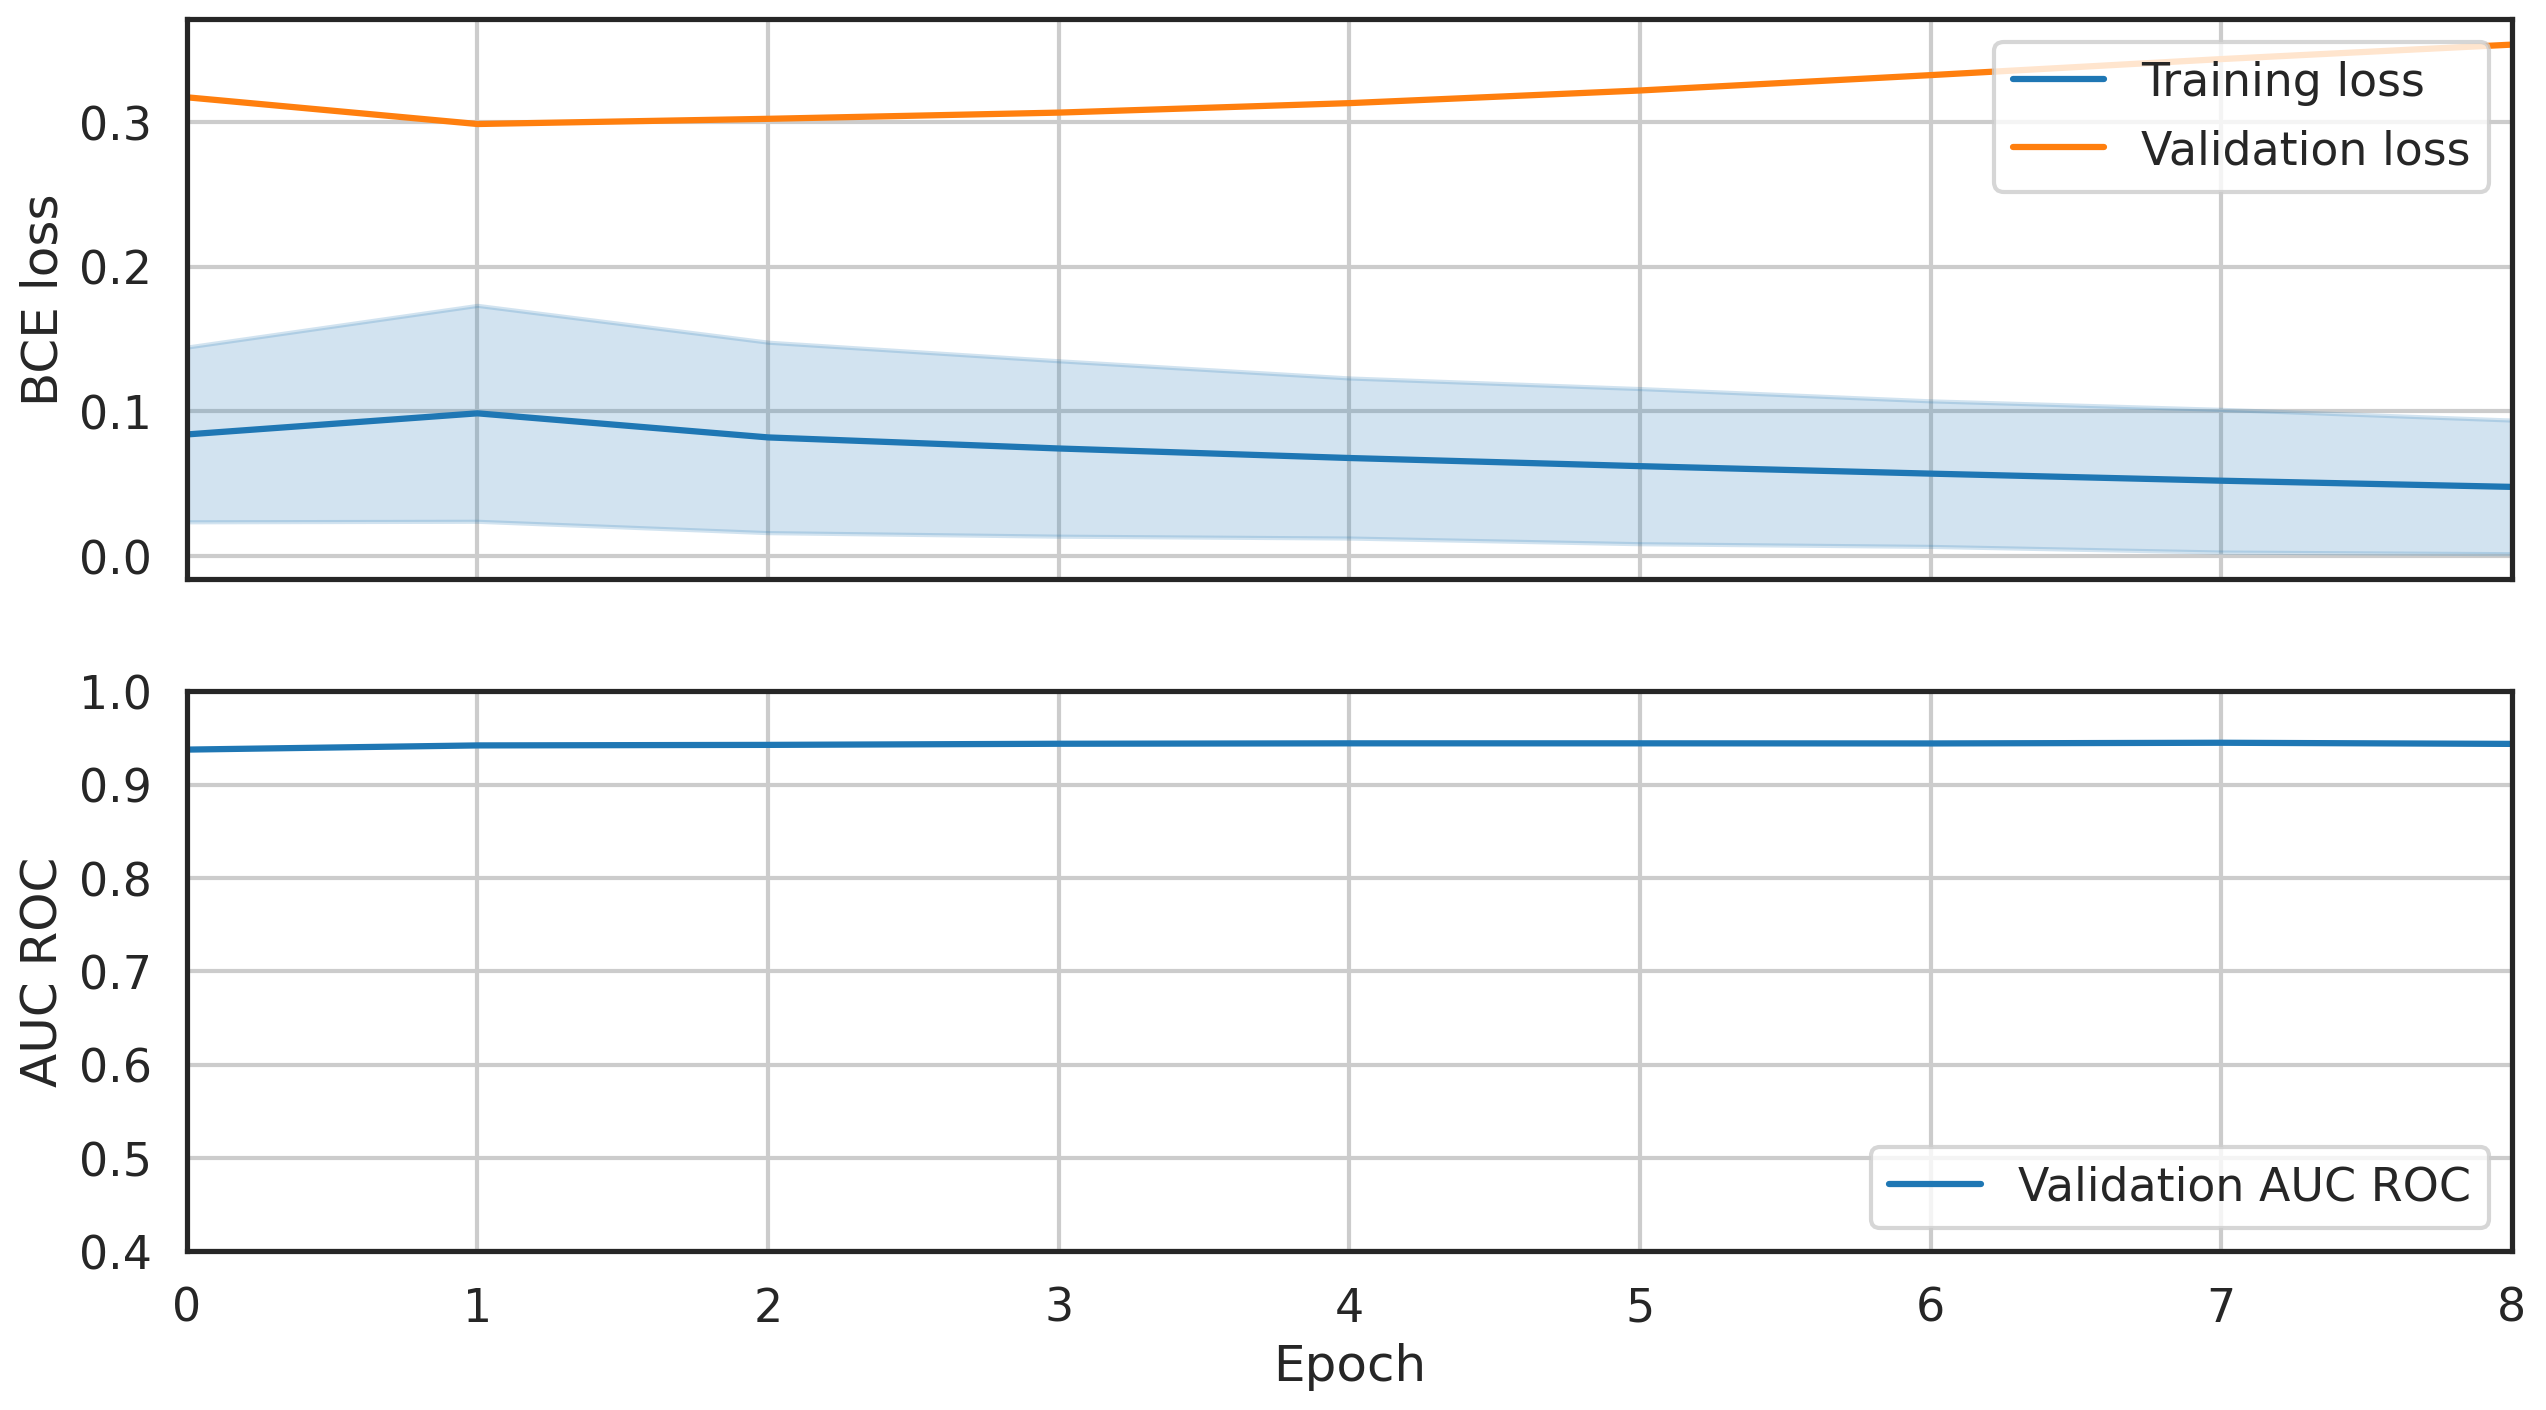

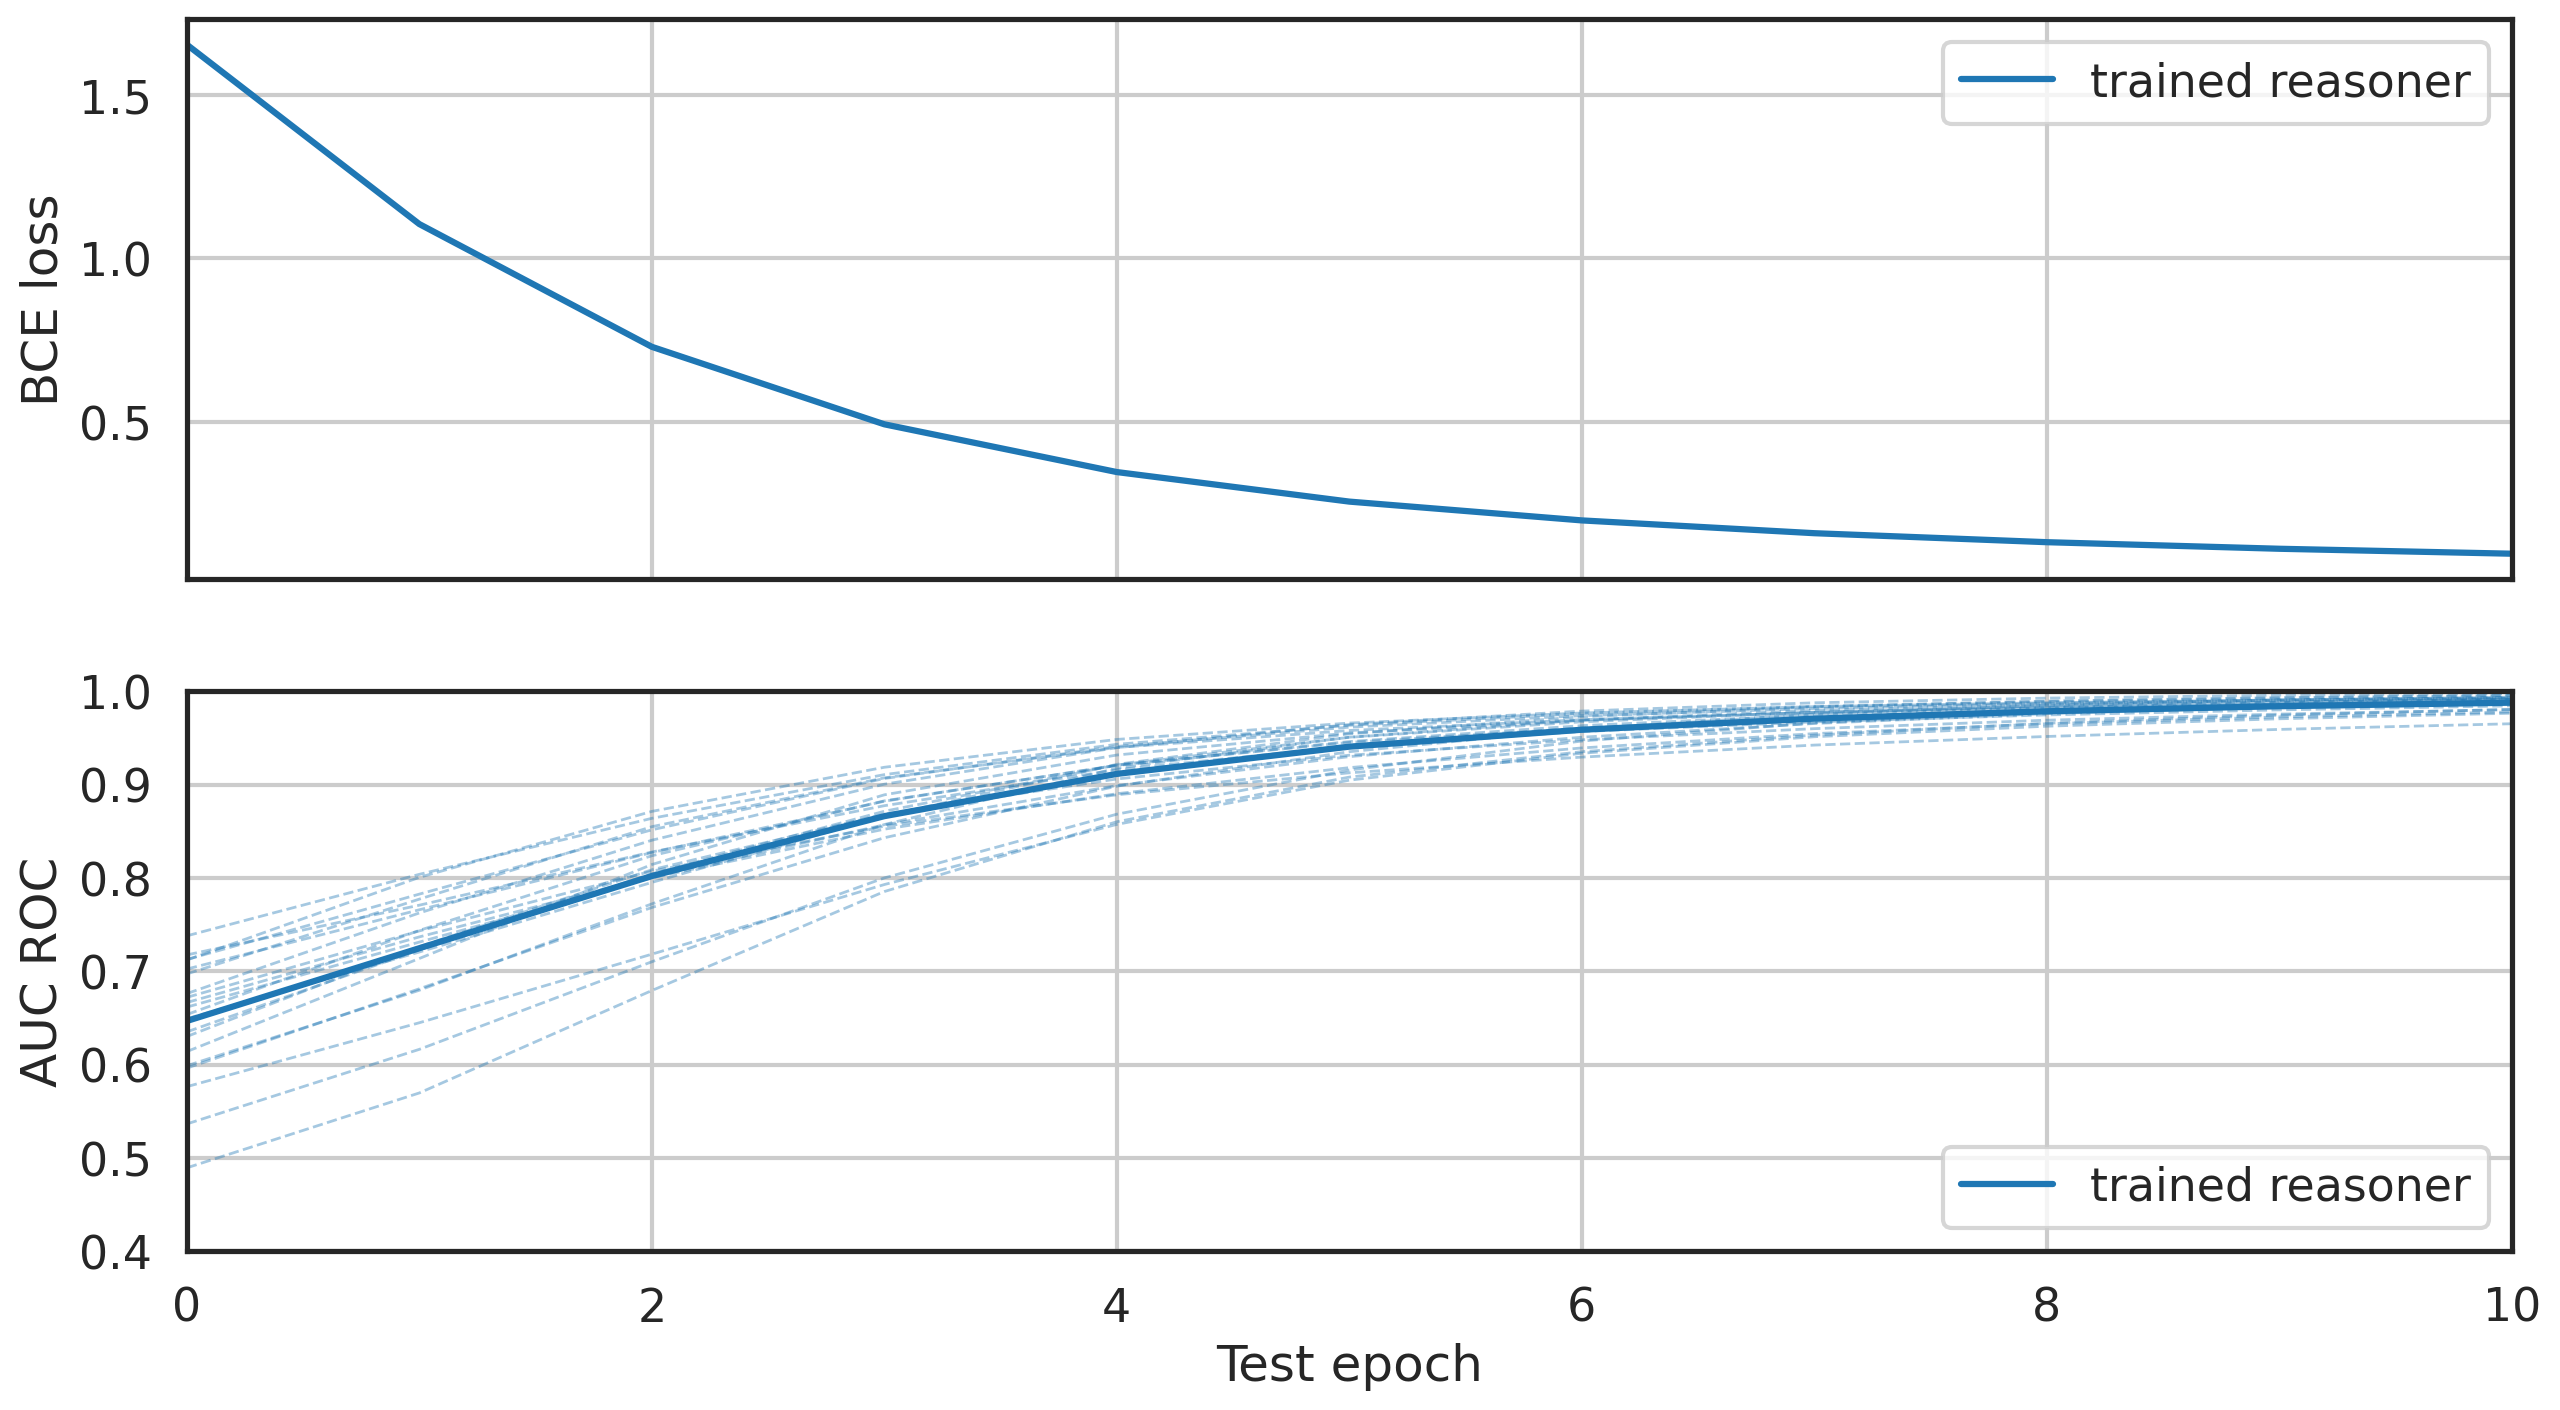

             mean       std     micro
acc      0.966575  0.014487  0.966575
prec     0.950681  0.028833  0.950974
recall   0.891619  0.036841  0.892249
f1       0.920145  0.032668  0.920676
auc_roc  0.987665  0.008042  0.988409
auc_pr   0.971655  0.016118  0.973400


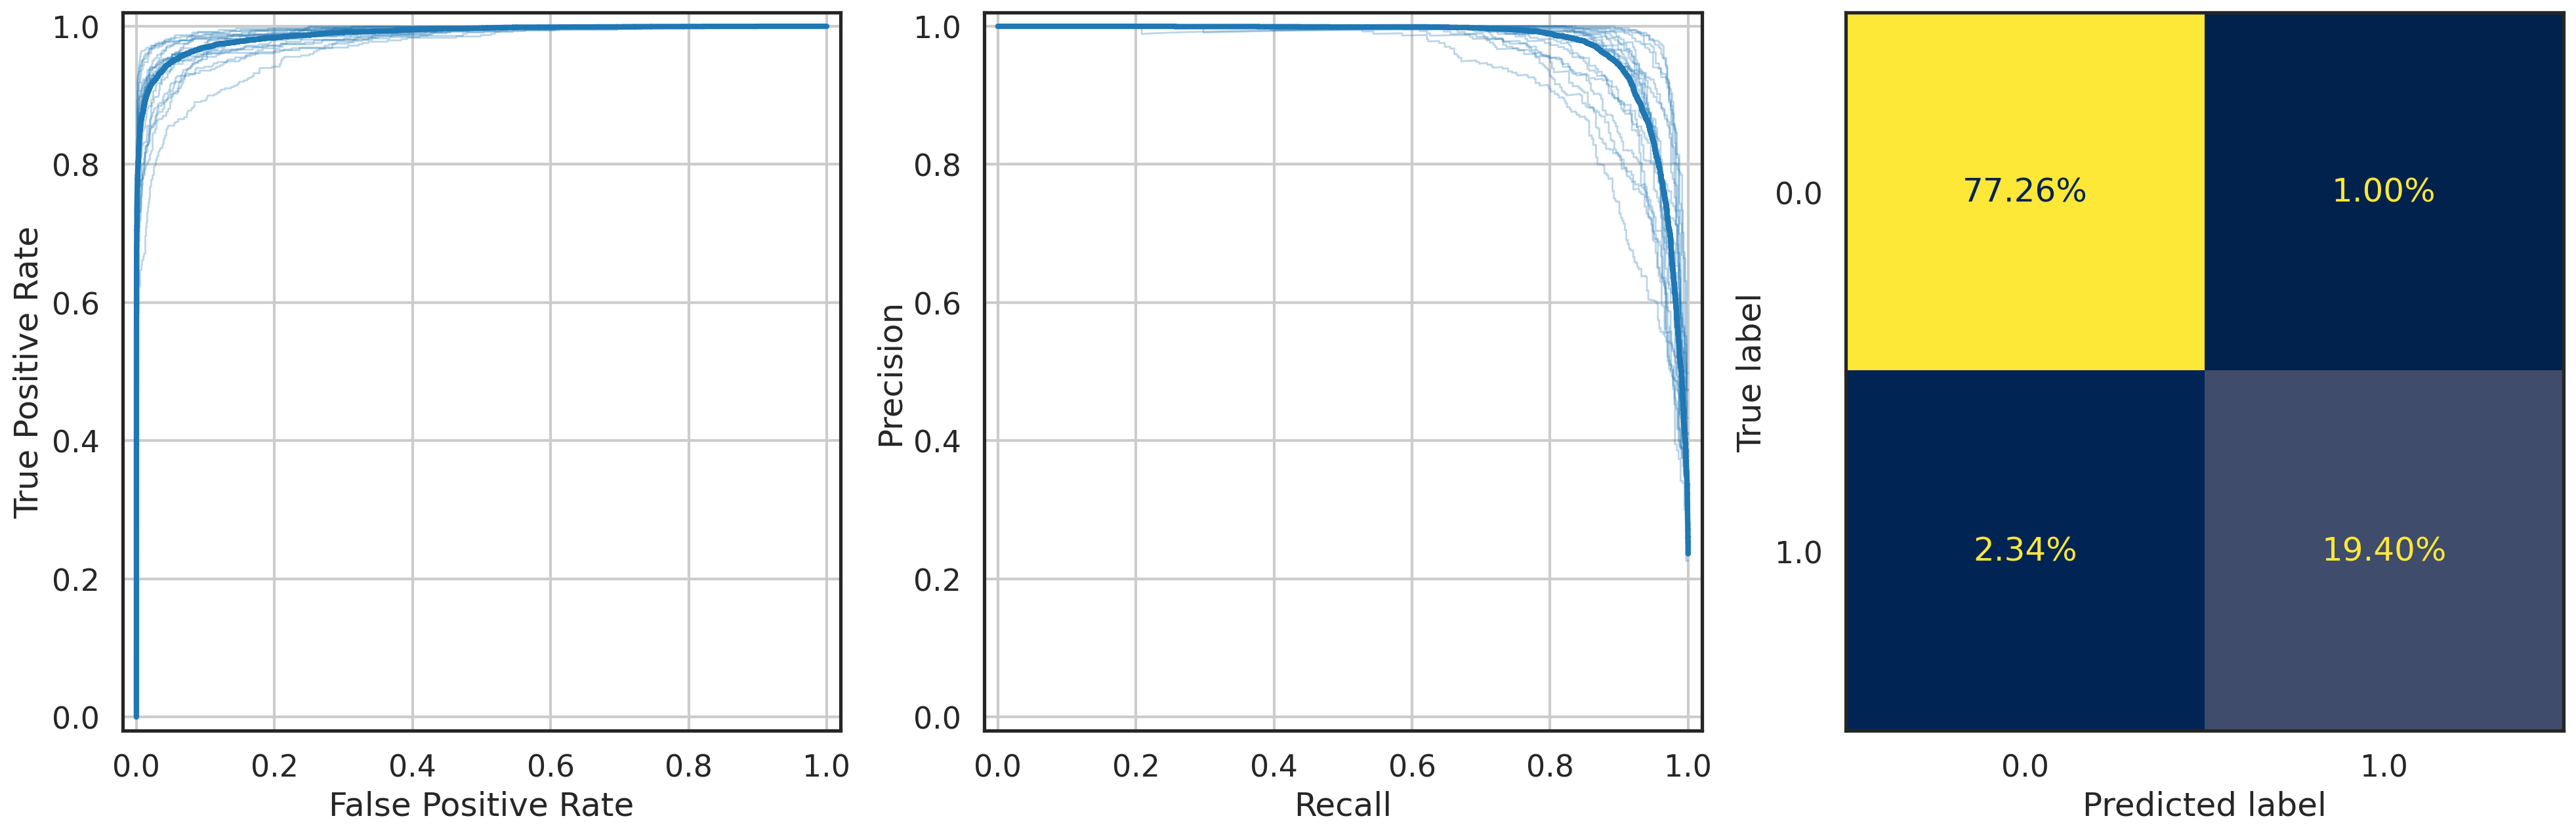

In [7]:
base = 'local/out/exp/' + ts
mkdirp(base)
print(base)

T.save(trained_reasoner.state_dict(), base+'/reasoner.pt')
df_tr = pd.DataFrame(train_logger.history_tr)
df_vl = pd.DataFrame(train_logger.history_vl)
df_tr.to_csv(base+'/train.csv', index=False)
df_vl.to_csv(base+'/valid.csv', index=False)
plot_train_history(df_tr, df_vl, save=base+'/train.png')

test_history_by_onto = pd.DataFrame(test_logger.history_vl_by_onto)
test_history = pd.DataFrame(test_logger.history_vl)
test_results = pd.DataFrame(dict(idx_te=idx_te, y_te=y_te, Y_te_good=Y_te_good))#, Y_te_rand=Y_te_rand))
test_history.to_csv(base+'/test.csv', index=False)
test_history_by_onto.to_csv(base+'/test-grouped.csv', index=False)
test_results.to_csv(base+'/test-results.csv', index=False)
plot_test_history(test_history, test_history_by_onto, save=base+'/test.png')
print(report(test_onto, y_te, np.array(Y_te_good), idx_te, save=base+'/%-trained'))
#print(report(test_onto, y_te, np.array(Y_te_rand), idx_te, save=base+'/%-random'))

In [8]:
T.set_printoptions(precision=4)

In [23]:
encoder = encoders[int(np.round(random.random() * (len(encoders ) - 1) , 0))]
input = encoder.concepts[ int(np.round( random.random() * encoder.n_concepts , 0) - 1) ]

print(input)
print(trained_reasoner.and_nn(im_mod( input, input)))
F.mse_loss(input, trained_reasoner.and_nn(im_mod(input, input)))

tensor([-0.1420, -0.1457,  0.1880, -0.1500,  0.0633, -0.1745,  0.1689, -0.0518,
        -0.1462,  0.0279], grad_fn=<SelectBackward0>)
tensor([-0.0247,  0.0169,  0.1563, -0.1698,  0.1139, -0.0929,  0.0898, -0.0357,
        -0.0975, -0.0416], grad_fn=<AddBackward0>)


tensor(0.0065, grad_fn=<MseLossBackward0>)

In [27]:
encoder = encoders[int(np.round(random.random() * (len(encoders ) - 1) , 0))]
input = encoder.concepts[ int(np.round( random.random() * encoder.n_concepts , 0) - 1) ]

print(trained_reasoner.bot_concept[0])
print(trained_reasoner.and_nn(im_mod(trained_reasoner.bot_concept[0], input)))
print(F.mse_loss(trained_reasoner.and_nn(im_mod(trained_reasoner.bot_concept[0], input)), trained_reasoner.bot_concept[0]))

tensor([ 0.1507,  0.1034,  0.1662, -0.1940,  0.2302, -0.0654, -0.0161,  0.0138,
        -0.0972, -0.0808], grad_fn=<SelectBackward0>)
tensor([ 0.1221,  0.1196,  0.1466, -0.1689,  0.2014, -0.0486, -0.0388, -0.0176,
        -0.1083, -0.0872], grad_fn=<AddBackward0>)
tensor(0.0005, grad_fn=<MseLossBackward0>)


In [31]:
encoder = encoders[int(np.round(random.random() * (len(encoders ) - 1) , 0))]
input = encoder.concepts[ int(np.round( random.random() * encoder.n_concepts , 0) - 1) ]

print(input)
print(trained_reasoner.and_nn(im_mod(trained_reasoner.top_concept[0], input)))
print(F.mse_loss(trained_reasoner.and_nn(im_mod(trained_reasoner.top_concept[0], input)), input))


tensor([-0.2567,  0.1057, -0.0832,  0.1253,  0.0268, -0.1874, -0.2384, -0.1507,
         0.0172,  0.2377], grad_fn=<SelectBackward0>)
tensor([-0.2047, -0.0218, -0.0787,  0.1527,  0.0009, -0.1182, -0.1749, -0.1307,
        -0.0380,  0.2088], grad_fn=<AddBackward0>)
tensor(0.0033, grad_fn=<MseLossBackward0>)


In [35]:
encoder = encoders[int(np.round(random.random() * (len(encoders ) - 1) , 0))]
input = encoder.concepts[ int(np.round( random.random() * encoder.n_concepts , 0) - 1) ]

print(trained_reasoner.bot_concept[0])
output = trained_reasoner.and_nn(im_mod(trained_reasoner.not_nn(input), input))
print(output)
print(F.mse_loss(output, input))


tensor([ 0.1507,  0.1034,  0.1662, -0.1940,  0.2302, -0.0654, -0.0161,  0.0138,
        -0.0972, -0.0808], grad_fn=<SelectBackward0>)
tensor([ 0.0185,  0.0205, -0.0339, -0.0640,  0.0777, -0.0323, -0.0406, -0.0686,
         0.0643, -0.0150], grad_fn=<AddBackward0>)
tensor(0.0227, grad_fn=<MseLossBackward0>)


In [38]:
print(trained_reasoner.bot_concept[0])
output = trained_reasoner.not_nn(trained_reasoner.top_concept[0])
print(output)
print(F.mse_loss(trained_reasoner.bot_concept[0], output))

tensor([ 0.1507,  0.1034,  0.1662, -0.1940,  0.2302, -0.0654, -0.0161,  0.0138,
        -0.0972, -0.0808], grad_fn=<SelectBackward0>)
tensor([ 0.1381,  0.1356,  0.1892, -0.2717,  0.2807, -0.0905, -0.0355,  0.0109,
        -0.0943, -0.1228], grad_fn=<SqueezeBackward3>)
tensor(0.0013, grad_fn=<MseLossBackward0>)


In [40]:
print(trained_reasoner.top_concept[0])
output = trained_reasoner.not_nn(trained_reasoner.bot_concept[0])
print(output)
print(F.mse_loss(trained_reasoner.top_concept[0], output))

tensor([-0.0954, -0.2660, -0.0533,  0.4148,  0.0656,  0.1555,  0.4667,  0.2066,
        -0.2088,  0.2886], grad_fn=<SelectBackward0>)
tensor([-0.0266, -0.2249, -0.0211,  0.3548,  0.0496,  0.1343,  0.3979,  0.1862,
        -0.1755,  0.2490], grad_fn=<SqueezeBackward3>)
tensor(0.0020, grad_fn=<MseLossBackward0>)


In [41]:
encoder = encoders[int(np.round(random. random() * (len(encoders) - 1), 0))]
input1 = encoder.concepts[int(np.round(random. random() * encoder.n_concepts, 0) - 1)]

encoder = encoders[int(np.round(random. random() * (len(encoders) - 1), 0))]
input2 = encoder.concepts[int(np.round(random. random() * encoder.n_concepts, 0) - 1)]

encoder = encoders[int(np.round(random. random() * (len(encoders) - 1), 0))]
input3 = encoder.concepts[int(np.round(random. random() * encoder.n_concepts, 0) - 1)]

print(trained_reasoner.and_nn(im_mod(input1, trained_reasoner.and_nn(im_mod(input2, input3)))))
print(trained_reasoner.and_nn(im_mod(trained_reasoner.and_nn(im_mod(input1, input2)), input3)))


F.mse_loss(trained_reasoner.and_nn(im_mod(input1, trained_reasoner.and_nn(im_mod(input2, input3)))), trained_reasoner.and_nn(im_mod(trained_reasoner.and_nn(im_mod(input1, input2)), input3)))

tensor([ 0.1364,  0.1353,  0.1343, -0.1752,  0.2086, -0.1018, -0.0518,  0.0092,
        -0.1032, -0.0980], grad_fn=<AddBackward0>)
tensor([ 0.1684,  0.1074,  0.1211, -0.1817,  0.2326, -0.0654, -0.0488,  0.0111,
        -0.1362, -0.1377], grad_fn=<AddBackward0>)


tensor(0.0007, grad_fn=<MseLossBackward0>)

In [43]:
print(trained_reasoner.and_nn(im_mod(input1, input3)))
print(trained_reasoner.and_nn(im_mod(input3, input1)))

F.mse_loss(trained_reasoner.and_nn(im_mod(input1, input3)), trained_reasoner.and_nn(im_mod(input3, input1)))

tensor([ 0.1549,  0.1262,  0.1329, -0.1901,  0.2540, -0.0719, -0.0328,  0.0003,
        -0.1698, -0.1504], grad_fn=<AddBackward0>)
tensor([ 0.1575,  0.1015,  0.0934, -0.1724,  0.2470, -0.0566, -0.0459,  0.0192,
        -0.1983, -0.1168], grad_fn=<AddBackward0>)


tensor(0.0005, grad_fn=<MseLossBackward0>)

In [44]:
print(input1)
print(trained_reasoner.and_nn(im_mod(input1, trained_reasoner.top_concept[0])))

F.mse_loss(input1, trained_reasoner.and_nn(im_mod(input1, trained_reasoner.top_concept[0])))

tensor([-0.2306,  0.1280, -0.0549,  0.0799,  0.0758, -0.0832,  0.0267,  0.0756,
        -0.1035,  0.1076], grad_fn=<SelectBackward0>)
tensor([-0.1894,  0.0416, -0.0388,  0.0981,  0.0405, -0.0445,  0.0435,  0.0442,
        -0.0899,  0.1178], grad_fn=<AddBackward0>)


tensor(0.0014, grad_fn=<MseLossBackward0>)